In [1]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from scipy.stats import zscore, ks_2samp
from sklearn.impute import KNNImputer
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import pickle
import math

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [3]:
with open('df.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [5]:
df = loaded_data
df = df.set_index('userId')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     4008 non-null   int64   
 1   counts_pictures         4008 non-null   int64   
 2   counts_profileVisits    4008 non-null   int64   
 3   counts_kisses           4008 non-null   int64   
 4   flirtInterests_chat     4008 non-null   int64   
 5   flirtInterests_friends  4008 non-null   int64   
 6   flirtInterests_date     4008 non-null   int64   
 7   isVIP                   4008 non-null   int64   
 8   isVerified              4008 non-null   int64   
 9   lastOnlineTs            4007 non-null   float64 
 10  lang_count              4008 non-null   int64   
 11  lang_fr                 4008 non-null   int64   
 12  lang_de                 4008 non-null   int64   
 13  count

# Missing Values

In [6]:
missing_percentage = df.isna().mean() * 100

# Convert to DataFrame
missing_df = pd.DataFrame({
    'Column': missing_percentage.index,
    'Percentage of Missing': missing_percentage.values
})

In [7]:
missing_df

,Column,Percentage of Missing
0,age,0.000000
1,counts_pictures,0.000000
2,counts_profileVisits,0.000000
3,counts_kisses,0.000000
4,flirtInterests_chat,0.000000
5,flirtInterests_friends,0.000000
6,flirtInterests_date,0.000000
7,isVIP,0.000000
8,isVerified,0.000000
9,lastOnlineTs,0.024950


<Axes: >

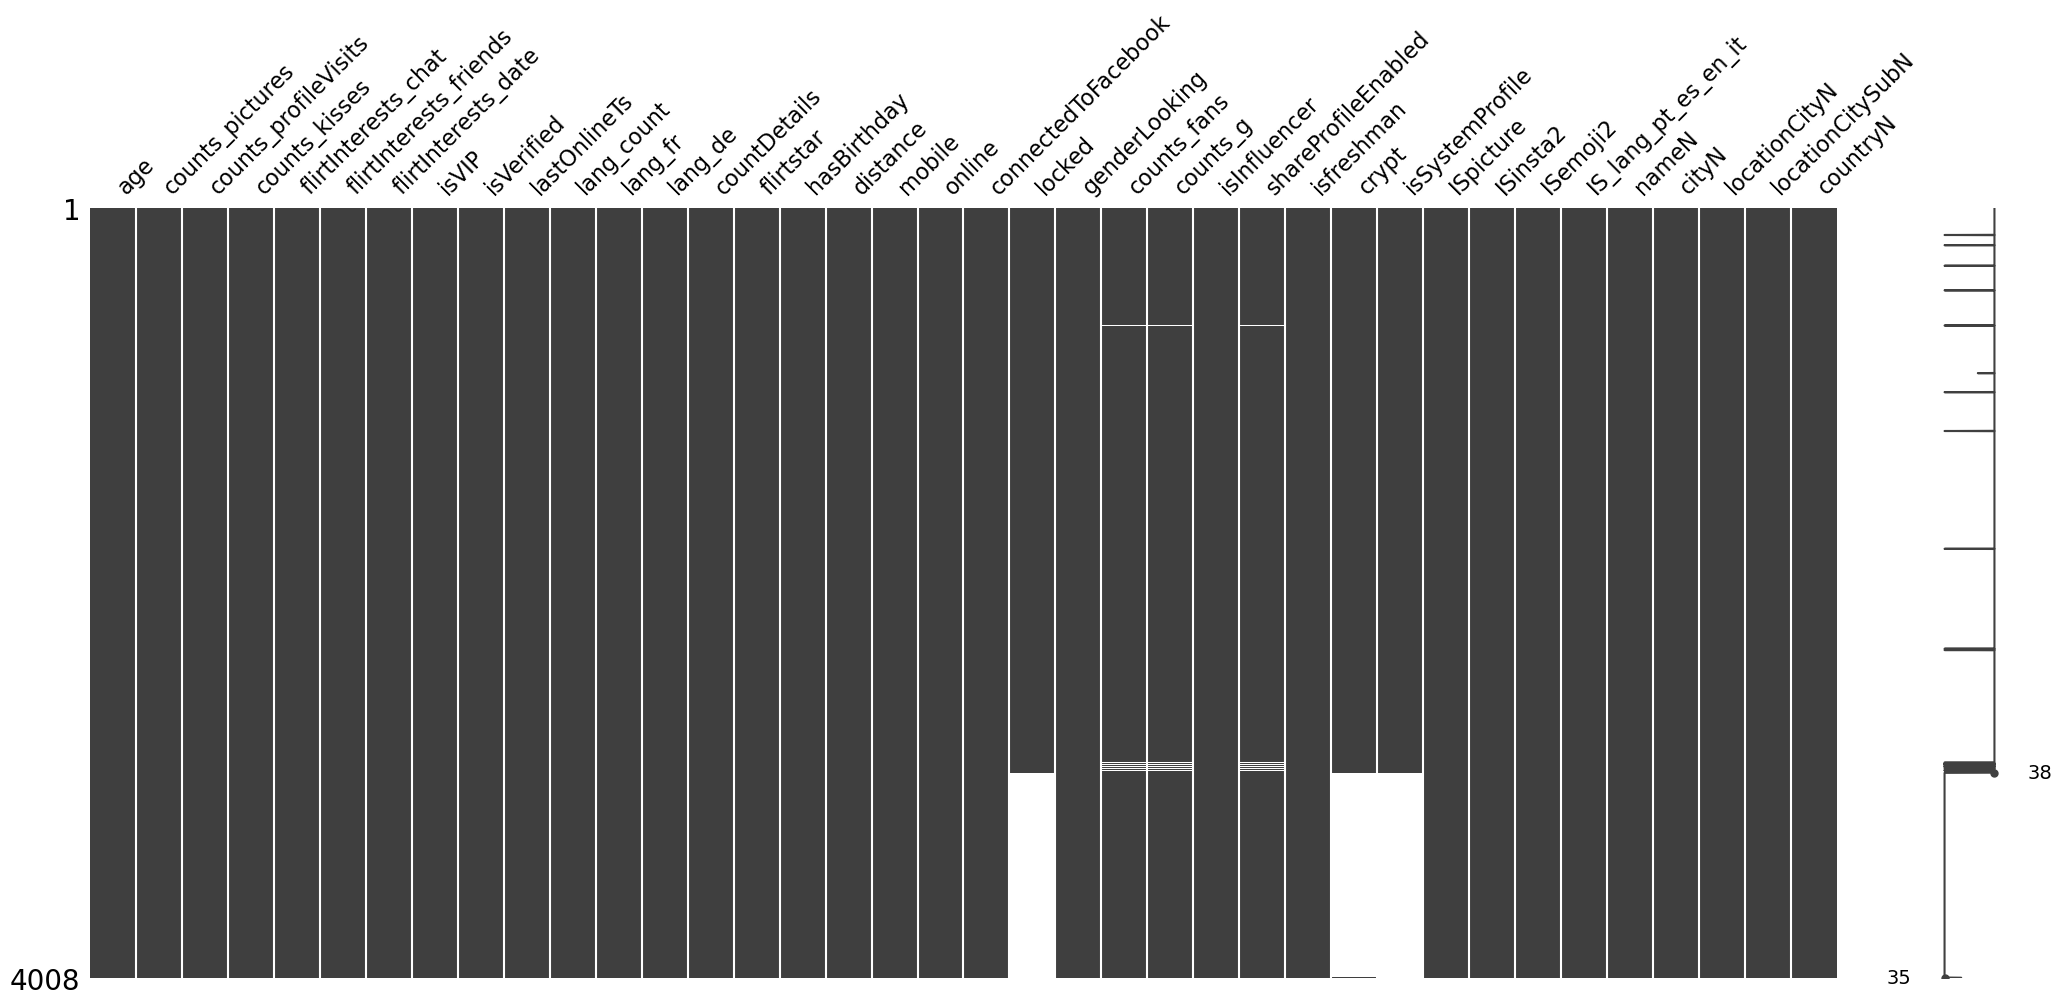

In [8]:
msno.matrix(df)

In [9]:
df = df.reset_index()
df.head()

,userId,age,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,isVIP,isVerified,...,isSystemProfile,ISpicture,ISinsta2,ISemoji2,IS_lang_pt_es_en_it,nameN,cityN,locationCityN,locationCitySubN,countryN
0,4e3842f79b70e7ea57000064,25,4,8279,239,1,1,1,0,0,...,0.0,1,0,0,0,Other,Other,Other,nan,CH
1,4e3d34bf5d2bce7b160006a3,22,5,663,13,1,1,1,0,0,...,0.0,1,0,0,1,Other,Other,Other,nan,CH
2,4eef8b81ebf2c8f64000000c,20,3,22187,1015,1,1,0,0,0,...,0.0,1,1,0,1,Other,Other,Berne,nan,Other
3,4ef9434cca61bece6a000002,24,18,7339,180,1,0,1,0,0,...,0.0,1,0,0,1,Other,Other,Other,nan,DE
4,4f10cbc1883fa97a5f000015,24,13,18672,492,0,1,0,0,0,...,0.0,1,1,0,1,Anna,Stuttgart,Stuttgart,nan,DE


# KNN

In [10]:
no_missing_df = df.copy()
imp_cols = no_missing_df.select_dtypes(include = ['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=1)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(no_missing_df[imp_cols]),columns = imp_cols)

In [11]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4008 non-null   float64
 1   counts_pictures         4008 non-null   float64
 2   counts_profileVisits    4008 non-null   float64
 3   counts_kisses           4008 non-null   float64
 4   flirtInterests_chat     4008 non-null   float64
 5   flirtInterests_friends  4008 non-null   float64
 6   flirtInterests_date     4008 non-null   float64
 7   isVIP                   4008 non-null   float64
 8   isVerified              4008 non-null   float64
 9   lastOnlineTs            4008 non-null   float64
 10  lang_count              4008 non-null   float64
 11  lang_fr                 4008 non-null   float64
 12  lang_de                 4008 non-null   float64
 13  countDetails            4008 non-null   float64
 14  flirtstar               4008 non-null   

In [12]:
no_missing_df[imp_cols] = imputed_data
no_missing_df

,userId,age,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,isVIP,isVerified,...,isSystemProfile,ISpicture,ISinsta2,ISemoji2,IS_lang_pt_es_en_it,nameN,cityN,locationCityN,locationCitySubN,countryN
0,4e3842f79b70e7ea57000064,25.0,4.0,8279.0,239.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,Other,Other,Other,nan,CH
1,4e3d34bf5d2bce7b160006a3,22.0,5.0,663.0,13.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,Other,Other,Other,nan,CH
2,4eef8b81ebf2c8f64000000c,20.0,3.0,22187.0,1015.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,Other,Other,Berne,nan,Other
3,4ef9434cca61bece6a000002,24.0,18.0,7339.0,180.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,Other,Other,Other,nan,DE
4,4f10cbc1883fa97a5f000015,24.0,13.0,18672.0,492.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,Anna,Stuttgart,Stuttgart,nan,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,55229e2fe66da132848b45a9,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Jenny,Other,Other,nan,DE
4004,55229eb5e56da11a2c8b45a6,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Lisa,KÃ¶ln,KÃ¶ln,nan,DE
4005,CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRy...,24.0,7.0,6049.0,507.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,Other,Lausanne,Prilly,nan,CH
4006,CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4m...,21.0,5.0,378.0,26.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,Other,Other,Other,nan,CH


<Axes: >

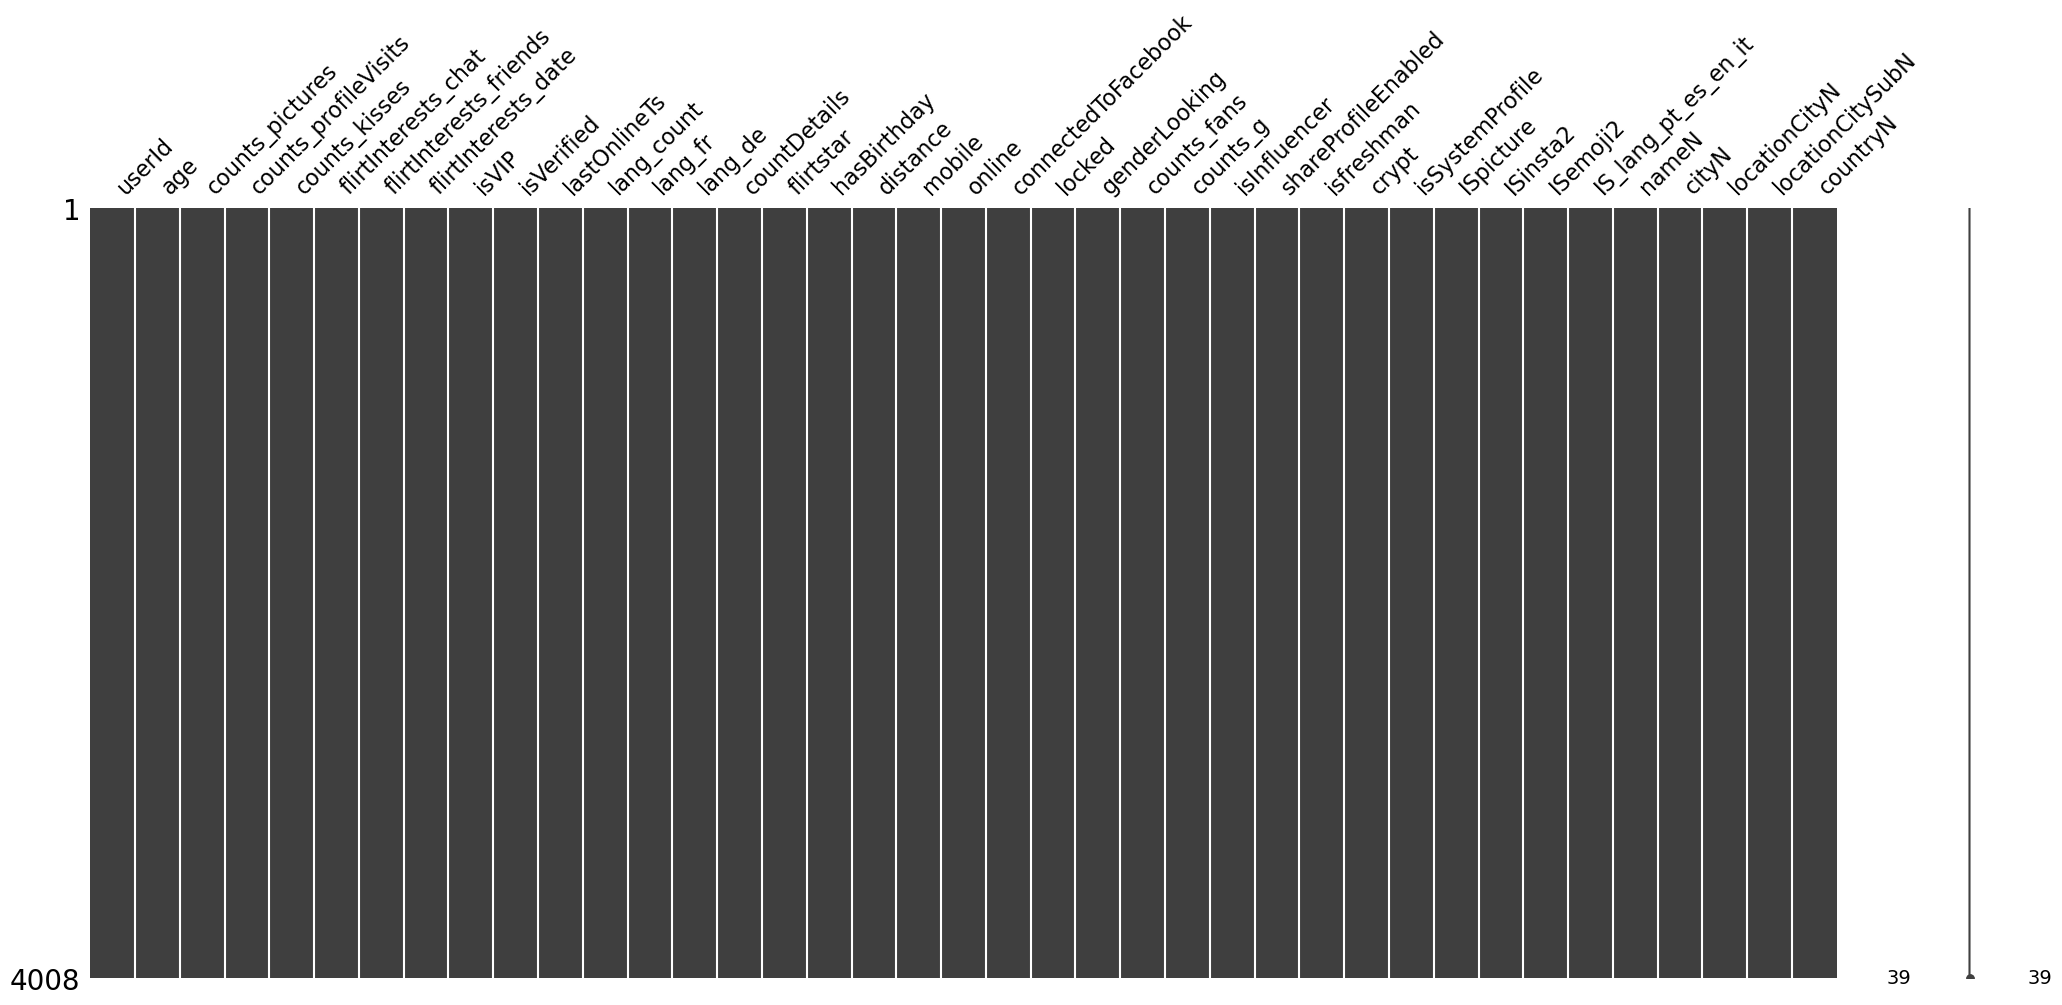

In [13]:
msno.matrix(no_missing_df)

In [14]:
no_missing_df.isnull().sum()

userId                    0
age                       0
counts_pictures           0
counts_profileVisits      0
counts_kisses             0
flirtInterests_chat       0
flirtInterests_friends    0
flirtInterests_date       0
isVIP                     0
isVerified                0
lastOnlineTs              0
lang_count                0
lang_fr                   0
lang_de                   0
countDetails              0
flirtstar                 0
hasBirthday               0
distance                  0
mobile                    0
online                    0
connectedToFacebook       0
locked                    0
genderLooking             0
counts_fans               0
counts_g                  0
isInfluencer              0
shareProfileEnabled       0
isfreshman                0
crypt                     0
isSystemProfile           0
ISpicture                 0
ISinsta2                  0
ISemoji2                  0
IS_lang_pt_es_en_it       0
nameN                     0
cityN               

In [15]:
no_missing_df.to_csv('no_missing_df.csv')

In [16]:
no_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   userId                  4008 non-null   object  
 1   age                     4008 non-null   float64 
 2   counts_pictures         4008 non-null   float64 
 3   counts_profileVisits    4008 non-null   float64 
 4   counts_kisses           4008 non-null   float64 
 5   flirtInterests_chat     4008 non-null   float64 
 6   flirtInterests_friends  4008 non-null   float64 
 7   flirtInterests_date     4008 non-null   float64 
 8   isVIP                   4008 non-null   float64 
 9   isVerified              4008 non-null   float64 
 10  lastOnlineTs            4008 non-null   float64 
 11  lang_count              4008 non-null   float64 
 12  lang_fr                 4008 non-null   float64 
 13  lang_de                 4008 non-null   float64 
 14  countDetails            

In [17]:
for col in no_missing_df.select_dtypes(exclude ='number'):
    print(no_missing_df.value_counts(col))

userId
4e3842f79b70e7ea57000064                                       1
55182ad7cb6da15b418b4587                                       1
55180100cb6da1d0648b459b                                       1
551802b6c56da14d5c8b458e                                       1
55180791c86da116938b4d14                                       1
                                                              ..
54b27ff3180ba014778b4892                                       1
54b29e2b140ba071558b4a5d                                       1
54b2c06a170ba05f2f8b4734                                       1
54b2cceb140ba0751d8b49bf                                       1
CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==    1
Name: count, Length: 4008, dtype: int64
genderLooking
M       3574
none     363
F         25
nan       25
both      21
Name: count, dtype: int64
nameN
Other       3672
Sarah         33
Laura         26
Lisa          23
Julia         23
Jenny         20
Nadine        19
Marie   

In [18]:
for col in no_missing_df.select_dtypes(include ='number'):
    print(no_missing_df.value_counts(col))

age
22.0    721
21.0    618
23.0    601
24.0    536
20.0    533
19.0    523
25.0    356
26.0    117
18.0      1
27.0      1
28.0      1
Name: count, dtype: int64
counts_pictures
3.0     648
1.0     634
4.0     594
2.0     544
5.0     383
6.0     272
7.0     179
8.0     143
9.0     109
0.0      90
11.0     70
10.0     54
12.0     46
13.0     40
15.0     30
14.0     29
16.0     20
18.0     19
17.0     14
19.0     14
22.0     11
30.0     11
20.0     10
21.0      9
26.0      8
23.0      7
25.0      6
24.0      5
29.0      4
27.0      3
28.0      2
Name: count, dtype: int64
counts_profileVisits
0.0         40
1.0         19
3.0         10
4.0          9
18.0         9
            ..
2123.0       1
2119.0       1
2117.0       1
2116.0       1
164425.0     1
Name: count, Length: 2683, dtype: int64
counts_kisses
0.0       212
1.0       117
2.0       102
4.0        84
3.0        83
         ... 
593.0       1
591.0       1
589.0       1
237.0       1
9288.0      1
Name: count, Length: 668, dtyp

In [19]:
final_df = no_missing_df.set_index('userId')
final_df.to_csv('final_df.csv')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     4008 non-null   float64 
 1   counts_pictures         4008 non-null   float64 
 2   counts_profileVisits    4008 non-null   float64 
 3   counts_kisses           4008 non-null   float64 
 4   flirtInterests_chat     4008 non-null   float64 
 5   flirtInterests_friends  4008 non-null   float64 
 6   flirtInterests_date     4008 non-null   float64 
 7   isVIP                   4008 non-null   float64 
 8   isVerified              4008 non-null   float64 
 9   lastOnlineTs            4008 non-null   float64 
 10  lang_count              4008 non-null   float64 
 11  lang_fr                 4008 non-null   float64 
 12  lang_de                 4008 non-null   float64 
 13  count

In [20]:
with open('final_df.pkl', 'wb') as f:
    pickle.dump(df, f)

In [21]:
# created a non category df in order to preform 'Lasso', 'SVM', 'GradientBoost', 'RandomForest'
no_category_featuers_df = final_df.select_dtypes(exclude=['category'])
no_category_featuers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4008 non-null   float64
 1   counts_pictures         4008 non-null   float64
 2   counts_profileVisits    4008 non-null   float64
 3   counts_kisses           4008 non-null   float64
 4   flirtInterests_chat     4008 non-null   float64
 5   flirtInterests_friends  4008 non-null   float64
 6   flirtInterests_date     4008 non-null   float64
 7   isVIP                   4008 non-null   float64
 8   isVerified              4008 non-null   float64
 9   lastOnlineTs            4008 non-null   float64
 10  lang_count              4008 non-null   float64
 11  lang_fr                 4008 non-null   float64
 12  lang_de                 4008 non-null   float64
 13  countDetails        

In [22]:
y = no_category_featuers_df['counts_kisses']
X = no_category_featuers_df.drop(columns=['counts_kisses'])

In [23]:
#lasso = Lasso(alpha=0.01).fit(X, y)
lasso = Lasso(alpha=0.1).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

In [24]:
svm = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

C:\Users\matar.aviv\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
rf = RandomForestClassifier().fit(X, y)
#rf_selected = (rf.feature_importances_ > 0).astype(int)
rf_selected = (rf.feature_importances_ > 0.01).astype(int)

In [26]:
#it ran forever so i stopped
#gb = GradientBoostingClassifier().fit(X, y)
#gb_selected = (gb.feature_importances_ > 0).astype(int)

In [27]:
# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    #'GradientBoost': gb_selected,
    'RandomForest': rf_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'RandomForest']].sum(axis=1)#, 'GradientBoost'

# Output the results
print(selection_df)

                   Feature  Lasso  SVM  RandomForest  Sum
0                      age      1    1             1    3
1          counts_pictures      1    1             1    3
2     counts_profileVisits      1    1             1    3
3      flirtInterests_chat      1    0             1    2
4   flirtInterests_friends      1    1             1    3
5      flirtInterests_date      1    0             1    2
6                    isVIP      1    0             0    1
7               isVerified      0    0             1    1
8             lastOnlineTs      1    1             1    3
9               lang_count      1    0             1    2
10                 lang_fr      1    0             1    2
11                 lang_de      1    0             1    2
12            countDetails      1    1             1    3
13               flirtstar      1    0             0    1
14             hasBirthday      0    0             0    0
15                distance      1    1             1    3
16            

In [28]:
#made a sample data in order to check GradientBoost
X_small = X.sample(500, random_state=42)
y_small = y.loc[X_small.index]

In [29]:
lasso = Lasso(alpha=0.01).fit(X_small, y_small)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

In [30]:
svm = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_small, y_small)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

C:\Users\matar.aviv\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
rf = RandomForestClassifier().fit(X_small, y_small)
rf_selected = (rf.feature_importances_ > 0).astype(int)

In [32]:
gb = GradientBoostingClassifier().fit(X_small, y_small)
#gb_selected = (gb.feature_importances_ > 0).astype(int)
gb_selected = (gb.feature_importances_ > 0.01).astype(int)

In [33]:
# Create a DataFrame to store results
selection_df2 = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected
})

# Sum the number of selections for each feature
selection_df2['Sum'] = selection_df2[['Lasso', 'SVM', 'GradientBoost', 'RandomForest']].sum(axis=1)

# Output the results
print(selection_df2)

                   Feature  Lasso  SVM  GradientBoost  RandomForest  Sum
0                      age      1    0              1             1    3
1          counts_pictures      1    1              1             1    4
2     counts_profileVisits      1    1              1             1    4
3      flirtInterests_chat      1    0              0             1    2
4   flirtInterests_friends      1    0              0             1    2
5      flirtInterests_date      1    0              0             1    2
6                    isVIP      1    0              0             1    2
7               isVerified      1    0              1             1    3
8             lastOnlineTs      1    1              1             1    4
9               lang_count      1    0              1             1    3
10                 lang_fr      1    0              0             1    2
11                 lang_de      1    0              0             1    2
12            countDetails      1    0             

In [34]:
#tried also LinearRegression for that went back to the original data with the categories
#and did one hot encoding
from sklearn.linear_model import LinearRegression

# Prepare data
X = final_df.drop(columns=['counts_kisses'])
y = final_df['counts_kisses']

# One-Hot Encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_encoded, y)

# Get feature importances (coefficients)
feature_importance = pd.Series(model.coef_, index=X_encoded.columns).sort_values(ascending=False)


In [35]:
lr_selected = (feature_importance > 0).astype(int)
lr_selected

locationCityN_Rheinfelden    1
locationCityN_Lyon           1
locationCityN_Prilly         1
locationCitySubN_nan         1
cityN_Fribourg               1
                            ..
nameN_Cindy                  0
nameN_Marie                  0
nameN_Sandra                 0
nameN_Anna                   0
nameN_Vanessa                0
Length: 164, dtype: int32

In [ ]:
#checked which of the features are 0 also in LinearRegression and also in above and droped them 
'''
both
locked shareProfileEnabled ISpicture ISinsta2
0
hasBirthday isInfluencer crypt
1
isSystemProfile flirtstar isVIP
2 and linear
flirtInterests_chat flirtInterests_friends flirtInterests_date isVerified lang_de ISemoji2
2
isfreshman counts_g online lang_fr
'''

In [36]:
 #Selecting variables with a sum of selections >= 3
#final_var = selection_df[selection_df['Sum'] >= 3]['Feature'].tolist()
final_var = final_df.drop(columns = ['locked','shareProfileEnabled','ISpicture','ISinsta2','hasBirthday','isInfluencer','crypt','isSystemProfile','flirtstar','isVIP']).columns.tolist()
df_model = final_df[final_var].copy()
df_model['counts_kisses'] = final_df['counts_kisses'].copy()

# Output the result to verify
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     4008 non-null   float64 
 1   counts_pictures         4008 non-null   float64 
 2   counts_profileVisits    4008 non-null   float64 
 3   counts_kisses           4008 non-null   float64 
 4   flirtInterests_chat     4008 non-null   float64 
 5   flirtInterests_friends  4008 non-null   float64 
 6   flirtInterests_date     4008 non-null   float64 
 7   isVerified              4008 non-null   float64 
 8   lastOnlineTs            4008 non-null   float64 
 9   lang_count              4008 non-null   float64 
 10  lang_fr                 4008 non-null   float64 
 11  lang_de                 4008 non-null   float64 
 12  countDetails            4008 non-null   float64 
 13  dista

In [38]:
# Initialize the label encoder
le = LabelEncoder()

# Encode the categorical columns and add them back to the DataFrame
for col in df_model.select_dtypes(include=['category']).columns.tolist():
    df_model[col] = le.fit_transform(df_model[col])

In [39]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4008 non-null   float64
 1   counts_pictures         4008 non-null   float64
 2   counts_profileVisits    4008 non-null   float64
 3   counts_kisses           4008 non-null   float64
 4   flirtInterests_chat     4008 non-null   float64
 5   flirtInterests_friends  4008 non-null   float64
 6   flirtInterests_date     4008 non-null   float64
 7   isVerified              4008 non-null   float64
 8   lastOnlineTs            4008 non-null   float64
 9   lang_count              4008 non-null   float64
 10  lang_fr                 4008 non-null   float64
 11  lang_de                 4008 non-null   float64
 12  countDetails            4008 non-null   float64
 13  distance            

In [40]:
with open('df_model.pkl', 'wb') as f:
    pickle.dump(df, f)

In [43]:
df_model.to_csv('df_model.csv')

In [44]:
c = pd.read_csv(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\df_model.csv')
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userId                  4008 non-null   object 
 1   age                     4008 non-null   float64
 2   counts_pictures         4008 non-null   float64
 3   counts_profileVisits    4008 non-null   float64
 4   counts_kisses           4008 non-null   float64
 5   flirtInterests_chat     4008 non-null   float64
 6   flirtInterests_friends  4008 non-null   float64
 7   flirtInterests_date     4008 non-null   float64
 8   isVerified              4008 non-null   float64
 9   lastOnlineTs            4008 non-null   float64
 10  lang_count              4008 non-null   float64
 11  lang_fr                 4008 non-null   float64
 12  lang_de                 4008 non-null   float64
 13  countDetails            4008 non-null   float64
 14  distance                4008 non-null   